## Practice with Machine Learning

***

The reported_heights and heights datasets were collected from three classes taught in the Departments of Computer Science and Biostatistics, as well as remotely through the Extension School. The Biostatistics class was taught in 2016 along with an online version offered by the Extension School. On 2016-01-25 at 8:15 AM, during one of the lectures, the instructors asked student to fill in the sex and height questionnaire that populated the reported_heights dataset. The online students filled out the survey during the next few days, after the lecture was posted online. We can use this insight to define a variable which we will call type, to denote the type of student, inclass or online.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import shap
import statsmodels.api as sm
import datetime
from datetime import datetime, timedelta
import scipy.stats
# import pandas_profiling
# from pandas_profiling import ProfileReport
#import graphviz

# import xgboost as xgb
# from xgboost import XGBClassifier, XGBRegressor
# from xgboost import to_graphviz, plot_importance

#from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, LogisticRegression, Ridge
#from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier, ExtraTreesRegressor
#from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor, HistGradientBoostingClassifier, HistGradientBoostingRegressor
from sklearn.linear_model import LogisticRegression

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)


#from sklearn.pipeline import Pipeline
#from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE, RFECV, SelectKBest, f_classif, f_regression, chi2

from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import export_graphviz, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score


#from tpot import TPOTClassifier, TPOTRegressor
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.over_sampling import RandomOverSampler
#from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

# import pickle
# from pickle import dump, load

# Use Folium library to plot values on a map.
#import folium

# Use Feature-Engine library

#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce


np.random.seed(0)

#from pycaret.classification import *
#from pycaret.clustering import *
#from pycaret.regression import *

pd.set_option('display.max_columns',100)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("dat.csv")

In [3]:
df

,sex,type
0,Female,inclass
1,Female,inclass
2,Male,inclass
3,Female,inclass
4,Male,inclass
...,...,...
145,Male,online
146,Male,online
147,Male,online
148,Female,online


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     150 non-null    object
 1   type    150 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB


In [5]:
df.describe(include='all')

,sex,type
count,150,150
unique,2,2
top,Male,online
freq,82,111


In [6]:
df.shape

(150, 2)

In [7]:
df.columns

Index(['sex', 'type'], dtype='object')

The type column of dat indicates whether students took classes in person ("inclass") or online ("online"). What proportion of the inclass group is female? What proportion of the online group is female?

### Groupby Function

In [8]:
df.groupby("sex").count()

,type
sex,
Female,68
Male,82


In [9]:
df.groupby("type").count()

,sex
type,
inclass,39
online,111


In [10]:
df.groupby(["type","sex"]).count()

Empty DataFrame
Columns: []
Index: [(inclass, Female), (inclass, Male), (online, Female), (online, Male)]

In [11]:
df[df["type"]=="inclass"].value_counts()

sex     type   
Female  inclass    26
Male    inclass    13
dtype: int64

In [12]:
26/39

0.6666666666666666

In [13]:
df[df["type"]=="online"].value_counts()

sex     type  
Male    online    69
Female  online    42
dtype: int64

In [14]:
42/111

0.3783783783783784

In the course videos, height cutoffs were used to predict sex. Instead of height, use the type variable to predict sex. Assume that for each class type the students are either all male or all female, based on the most prevalent sex in each class type you calculated in Q1. Report the accuracy of your prediction of sex based on type. You do not need to split the data into training and test sets.

In [15]:
df2 = pd.get_dummies(df, drop_first=True)

In [16]:
df2

,sex_Male,type_online
0,0,0
1,0,0
2,1,0
3,0,0
4,1,0
...,...,...
145,1,1
146,1,1
147,1,1
148,0,1


In [17]:
X = df2.sex_Male
y = df2.type_online

In [18]:
X.values.reshape(-1, 1), y.values.reshape(-1, 1)

(array([[0],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1, 1), y.values.reshape(-1, 1), test_size=0.2, random_state=0)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 1), (30, 1), (120, 1), (30, 1))

In [21]:
model = LogisticRegression()

In [22]:
model.fit(X_train,y_train)

LogisticRegression()

In [23]:
y_pred = model.predict(X_test)

In [24]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [25]:
accuracy_score(y_test,y_pred)

0.7333333333333333

Write a line of code using the table() function to show the confusion matrix between y_hat and y. Use the exact format function(a, b) for your answer and do not name the columns and rows. Your answer should have exactly one space. Enter the line of code below.

In [26]:
confusion_matrix(y_test,y_pred)

array([[ 0,  8],
       [ 0, 22]], dtype=int64)

What is the sensitivity of this prediction? You can use the sensitivity() function from the caret package. 

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.73      1.00      0.85        22

    accuracy                           0.73        30
   macro avg       0.37      0.50      0.42        30
weighted avg       0.54      0.73      0.62        30



What is the specificity of this prediction? You can use the specificity() function from the caret package. 

What is the prevalence (% of females) in the dat dataset defined above? 

### Practice with Machine Learning, Part 2

We will practice building a machine learning algorithm using a new dataset, iris, that provides multiple predictors for us to use to train. To start, we will remove the setosa species and we will focus on the versicolor and virginica iris species using the following code:

In [28]:
df3 = pd.read_csv("irismod.csv")

In [29]:
df3

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,7.00,3.20,4.70,1.40,versicolor
1,6.40,3.20,4.50,1.50,versicolor
2,6.90,3.10,4.90,1.50,versicolor
3,5.50,2.30,4.00,1.30,versicolor
4,6.50,2.80,4.60,1.50,versicolor
...,...,...,...,...,...
95,6.70,3.00,5.20,2.30,virginica
96,6.30,2.50,5.00,1.90,virginica
97,6.50,3.00,5.20,2.00,virginica
98,6.20,3.40,5.40,2.30,virginica


In [30]:
encoder = LabelEncoder()

In [31]:
df3["Species"] = encoder.fit_transform(df3["Species"])

In [32]:
df3.head(), df3.tail()

(   SepalLength  SepalWidth  PetalLength  PetalWidth  Species
 0         7.00        3.20         4.70        1.40        0
 1         6.40        3.20         4.50        1.50        0
 2         6.90        3.10         4.90        1.50        0
 3         5.50        2.30         4.00        1.30        0
 4         6.50        2.80         4.60        1.50        0,
     SepalLength  SepalWidth  PetalLength  PetalWidth  Species
 95         6.70        3.00         5.20        2.30        1
 96         6.30        2.50         5.00        1.90        1
 97         6.50        3.00         5.20        2.00        1
 98         6.20        3.40         5.40        2.30        1
 99         5.90        3.00         5.10        1.80        1)

### Train Test Split

In [33]:
X = df3.iloc[:,0:4]
y = df3.iloc[:,4]

In [34]:
X.values, y.values

(array([[7. , 3.2, 4.7, 1.4],
        [6.4, 3.2, 4.5, 1.5],
        [6.9, 3.1, 4.9, 1.5],
        [5.5, 2.3, 4. , 1.3],
        [6.5, 2.8, 4.6, 1.5],
        [5.7, 2.8, 4.5, 1.3],
        [6.3, 3.3, 4.7, 1.6],
        [4.9, 2.4, 3.3, 1. ],
        [6.6, 2.9, 4.6, 1.3],
        [5.2, 2.7, 3.9, 1.4],
        [5. , 2. , 3.5, 1. ],
        [5.9, 3. , 4.2, 1.5],
        [6. , 2.2, 4. , 1. ],
        [6.1, 2.9, 4.7, 1.4],
        [5.6, 2.9, 3.6, 1.3],
        [6.7, 3.1, 4.4, 1.4],
        [5.6, 3. , 4.5, 1.5],
        [5.8, 2.7, 4.1, 1. ],
        [6.2, 2.2, 4.5, 1.5],
        [5.6, 2.5, 3.9, 1.1],
        [5.9, 3.2, 4.8, 1.8],
        [6.1, 2.8, 4. , 1.3],
        [6.3, 2.5, 4.9, 1.5],
        [6.1, 2.8, 4.7, 1.2],
        [6.4, 2.9, 4.3, 1.3],
        [6.6, 3. , 4.4, 1.4],
        [6.8, 2.8, 4.8, 1.4],
        [6.7, 3. , 5. , 1.7],
        [6. , 2.9, 4.5, 1.5],
        [5.7, 2.6, 3.5, 1. ],
        [5.5, 2.4, 3.8, 1.1],
        [5.5, 2.4, 3.7, 1. ],
        [5.8, 2.7, 3.9, 1.2],
        [6

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [36]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50, 4), (50, 4), (50,), (50,))

### Univariate Feature Selection

In [37]:
select_feature = SelectKBest(chi2, k=4).fit(X_train,y_train)

In [38]:
select_feature.scores_

array([1.40678424, 0.30717464, 5.28437178, 3.71033654])

### Model Training

### Using Regression or Classification Models

In [39]:
model2 = LogisticRegression()

In [40]:
model2.fit(X_train,y_train)

LogisticRegression()

In [41]:
y_pred = model2.predict(X_test)

In [42]:
accuracy_score(y_test,y_pred)

0.9

Notice that we had an overall accuracy greater than 96% in the training data, but the overall accuracy was lower in the test data. This can happen often if we overtrain. In fact, it could be the case that a single feature is not the best choice. For example, a combination of features might be optimal. Using a single feature and optimizing the cutoff as we did on our training data can lead to overfitting.

Given that we know the test data, we can treat it like we did our training data to see if the same feature with a different cutoff will optimize our predictions. Repeat the analysis in Q8 but this time using the test data instead of the training data.
Which feature best optimizes our overall accuracy when using the test set?

Notice that Petal.Length and Petal.Width in combination could potentially be more information than either feature alone.

Optimize the the cutoffs for Petal.Length and Petal.Width separately in the train dataset by using the seq function with increments of 0.1. Then, report the overall accuracy when applied to the test dataset by creating a rule that predicts virginica if Petal.Length is greater than the length cutoff OR Petal.Width is greater than the width cutoff, and versicolor otherwise.
What is the overall accuracy for the test data now?

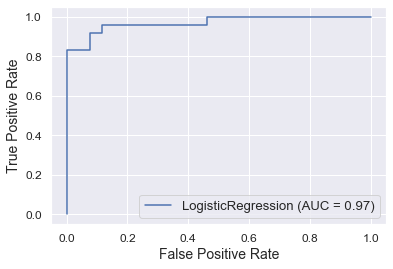

In [43]:
plot_roc_curve(model2,X_test,y_test)
plt.show()

In [44]:
model2.score(X_test,y_test)

0.9

#### Python code done by Dennis Lam